In [11]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

df = read_csv("./database/run1.csv", delim_whitespace=False, header=None)

df = df.iloc[1:]

feature_names = ['Serial Number', 'Substrate Thickness', 'Patch Length', 'Patch Width', 'Frequency', 'Return Loss (s11)', 'Gain']

df.columns = feature_names

df = df.apply(pd.to_numeric)

x = df[['Substrate Thickness', 'Patch Length', 'Patch Width']]
y = df[['Frequency', 'Return Loss (s11)', 'Gain']]

print(df.head())

print(df.info())

   Serial Number  Substrate Thickness  Patch Length  Patch Width  Frequency  \
1              1                   80           136          180     0.6535   
2              3                   82           136          180     0.6769   
3              4                   83           136          180     0.6805   
4              5                   84           136          180     0.6841   
5              6                   85           136          180     0.6841   

   Return Loss (s11)    Gain  
1            -23.114  9.9730  
2            -32.885  9.2812  
3            -56.370  9.1623  
4            -47.889  9.0913  
5            -38.306  9.0199  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 1 to 998
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial Number        998 non-null    int64  
 1   Substrate Thickness  998 non-null    int64  
 2   Patch Length         998 non-n

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               512       
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dense_37 (Dense)            (None, 3)                 387       
                                                                 
Total params: 50,435
Trainable params: 50,435
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
17/17 [==============================]

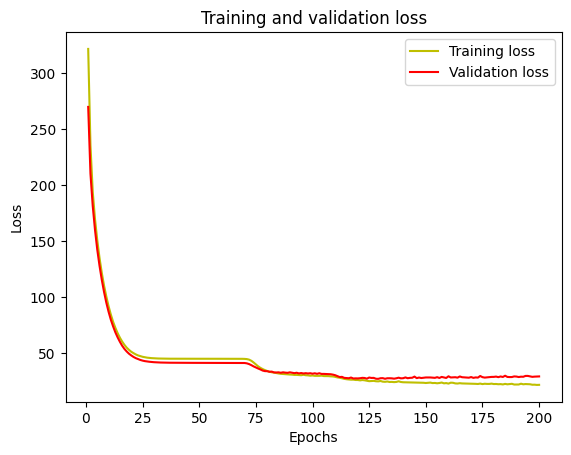

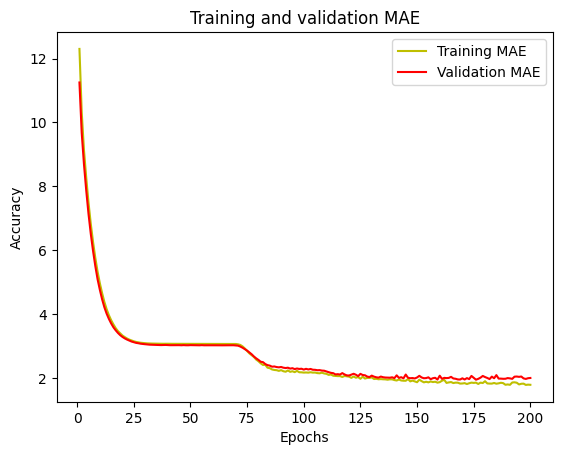

1/1 [==============================] - 0s 200ms/step
Predicted values are:  [[  0.6388271  -20.34778      9.222895  ]
 [  0.66953546 -31.753992     8.942413  ]
 [  0.6384351  -19.508995     9.224427  ]
 [  0.6705043  -38.861717     8.688682  ]
 [  0.65448487 -25.940662     9.178894  ]]
Real values are:       Frequency  Return Loss (s11)    Gain
741     0.6724            -22.928  9.0172
404     0.6805            -35.134  8.9444
530     0.6544            -18.841  9.6034
347     0.6877            -29.185  8.7434
471     0.6733            -30.347  9.1131
7/7 [==============================] - 0s 5ms/step - loss: 29.6926 - mae: 2.0447
Mean squared error from neural net:  29.69259262084961
Mean absolute error from neural net:  2.044679641723633


In [29]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
#Output layer
model.add(Dense(3, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs =200)

from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

In [20]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [28]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: \n", predictions)
print("Real values are: \n", y_test[:5])

Predicted values are: 
 [[  0.6717025 -22.87895     9.046983 ]
 [  0.685036  -32.12935     8.9632265]
 [  0.658072  -19.387355    9.475701 ]
 [  0.681958  -45.645305    8.812678 ]
 [  0.6720535 -29.75395     9.1482085]]
Real values are: 
      Frequency  Return Loss (s11)    Gain
741     0.6724            -22.928  9.0172
404     0.6805            -35.134  8.9444
530     0.6544            -18.841  9.6034
347     0.6877            -29.185  8.7434
471     0.6733            -30.347  9.1131


In [13]:
from __future__ import absolute_import, division, print_function

import pathlib
import pandas
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[3]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(3)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

    return model

model = build_model()

2.12.0


In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                256       
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,611
Trainable params: 4,611
Non-trainable params: 0
_________________________________________________________________


In [15]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: \n", predictions)

1/1 [==============================] - 0s 62ms/step
Predicted values are: 
 [[-0.09742586  0.22095972  0.09305312]
 [-0.08201828  0.19252391 -0.03280456]
 [-0.057517    0.27284282  0.01640146]
 [-0.07915493  0.15089957  0.06450693]
 [-0.05936565  0.22221646 -0.07363758]]


In [16]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end ='')

EPOCHS = 20

history = model.fit(
    X_train_scaled, y_train, validation_split=0.2, epochs=EPOCHS, verbose=0, callbacks=[PrintDot()]
)


....................

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


Mean squared error from linear regression:  33.16543519504176
Mean absolute error from linear regression:  2.232313675273073


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 200, random_state=20)
model.fit(X_train_scaled, y_train)


y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: \n", predictions)
print("Real values are: \n", y_test[:5])

Mean squared error using Random Forest:  27.09080409238113
Mean absolute error Using Random Forest:  1.7862263760833341
Predicted values are: 
 [[  0.6717025 -22.87895     9.046983 ]
 [  0.685036  -32.12935     8.9632265]
 [  0.658072  -19.387355    9.475701 ]
 [  0.681958  -45.645305    8.812678 ]
 [  0.6720535 -29.75395     9.1482085]]
Real values are: 
      Frequency  Return Loss (s11)    Gain
741     0.6724            -22.928  9.0172
404     0.6805            -35.134  8.9444
530     0.6544            -18.841  9.6034
347     0.6877            -29.185  8.7434
471     0.6733            -30.347  9.1131


In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
 
def per(x,y):
    num = 1
    while x != y:
        if x > y:
            x = x-(1/num)
        else:
            x = x+(1/num)
        num += 1
    return num
 
 
y1 = 2 #number with footprint
 
if int(input('Zoom search = 1, Normal search = 0:')) == 1:
    peak = float(input('Enter peak:'))
    search = float(input('Enter Search area:'))
    leng = int(input('Enter sample amount:'))
    l1 = np.zeros(leng)
    x1 = np.linspace(peak-(search*0.5),peak+(search*0.5), leng)
else:
    leng= int(input('Enter sample amount:'))
    x1 = np.linspace(0,2,leng)
    l1 = np.zeros(leng)
 
for i in range(leng):
    l1[i] = per(x1[i],y1)
l2 = l1
 
 
#max checker
for n in range(16):
    print(x1[np.argmax(l2)], np.max(l2))
    l2[np.argmax(l1)] = y1
 
plt.plot(x1,l1)
plt.show()

ValueError: invalid literal for int() with base 10: ''